# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Tiesya Andriani Ramadhanti]
- **Email:** [tiesyaandriani5@gmail.com]
- **ID Dicoding:** [MC189D5X0428]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah sepeda yang dipinjam dalam sehari selama satu tahun?
- Apakah ada batas suhu tertebtu di mana peminjaman sepeda mulai menurun?
- Apakah jumlah peminjaman lebih tinggi di working day atau holiday?
- Pada kondisi cuaca seperti apa peminjaman sepeda mencapai puncaknya dan kapan mengalami penurunan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#Import library untuk analisis data
import pandas as pd #untuk melakukan manipulasi data
import numpy as np #untuk melakukan perhitungan numerik

#Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Upload dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/hour.csv'

# Membaca dataset
hour_df = pd.read_csv(file_path)

# Menampilkan 5 data pertama
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
file_path = '/content/drive/MyDrive/Bike-sharing-dataset/day.csv'

# Membaca dataset
day_df = pd.read_csv(file_path)

# Menampilkan 5 data pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Insight Tahap Gathering Data:**

## 1. Membaca Dataset
Pada kode di atas, terdapat dua dataset yang digunakan:  
- **hour.csv**: berisi data peminjaman sepeda berdasarkan jam.  
- **day.csv**: berisi data peminjaman sepeda berdasarkan hari.  

Kedua dataset dibaca menggunakan `pd.read_csv(file_path)` dan menampilkan 5 baris pertama menggunakan `head()`.  

## 2. Struktur Dataset
Dari output yang ditampilkan, kedua dataset memiliki beberapa kolom yang serupa, seperti:  
- **instant**: indeks unik untuk setiap entri.  
- **dteday**: tanggal data dicatat.  
- **season**: musim (1=Musim Semi, 2=Musim Panas, 3=Musim Gugur, 4=Musim Dingin).  
- **yr**: tahun (0=2011, 1=2012).  
- **mnth**: bulan (1-12).  
- **holiday**: apakah hari tersebut hari libur (0=tidak, 1=ya).  
- **weekday**: hari dalam seminggu (0=Minggu, 6=Sabtu).  
- **workingday**: apakah hari tersebut hari kerja (0=tidak, 1=ya).  
- **weathersit**: kondisi cuaca (1=Cerah, 2=Berawan, 3=Hujan/Salju).  
- **temp** dan **atemp**: suhu aktual dan suhu terasa dalam skala normalisasi.  
- **hum**: kelembaban relatif.  
- **windspeed**: kecepatan angin dalam skala normalisasi.  
- **casual**: jumlah peminjam sepeda tanpa registrasi.  
- **registered**: jumlah peminjam sepeda yang terdaftar.  
- **cnt**: total jumlah peminjaman (casual + registered).  

## 3. Insight Awal dari Data  
- Dataset **hour.csv** memiliki data peminjaman dalam skala jam, sehingga lebih detail dibandingkan dengan **day.csv** yang berskala harian.  
- Data **day.csv** lebih cocok untuk analisis tren jangka panjang, sementara **hour.csv** lebih berguna untuk analisis pola penggunaan dalam sehari.  
- Kolom `cnt` menunjukkan bahwa jumlah peminjam harian berkisar antara ratusan hingga ribuan, tergantung pada faktor-faktor seperti cuaca, hari kerja, dan musim.  
- Pengguna yang **terdaftar (registered)** lebih banyak dibandingkan pengguna **kasual**, yang menunjukkan bahwa kebanyakan peminjam adalah pelanggan tetap.  


### Assessing Data

### Assessing `day_df`

In [8]:
print("\nInformasi Dataset day.cvs")
day_df.info()


Informasi Dataset day.cvs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print("\nJumlah Missing Values pada Dataset day.cvs")
day_df.isnull().sum()


Jumlah Missing Values pada Dataset day.cvs


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("\nJumlah Duplikasi Data pada Dataset day.cvs")
day_df.duplicated().sum()


Jumlah Duplikasi Data pada Dataset day.cvs


0

In [11]:
print("\nCek nilai negatif pada kolom cnt di day.csv:")
print(day_df[day_df["cnt"] < 0])


Cek nilai negatif pada kolom cnt di day.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [12]:
print("\nCek nilai temp yang tidak sesuai di day.csv:")
print(day_df[(day_df["temp"] < 0) | (day_df["temp"] > 1)])


Cek nilai temp yang tidak sesuai di day.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [13]:
print("\nCek nilai unik season di day.csv:")
day_df["season"].unique()


Cek nilai unik season di day.csv:


array([1, 2, 3, 4])

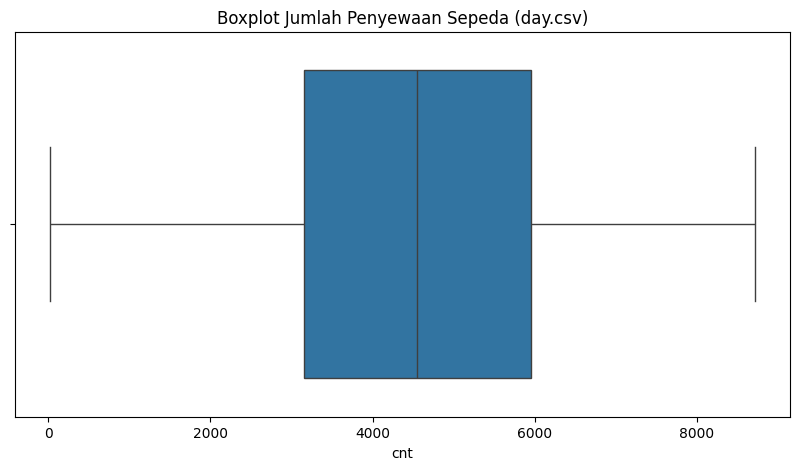

In [14]:
# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda (day.csv)")
plt.show()


### Assessing `hour_df`

In [15]:
# Menampilkan informasi dataset
print("\nInformasi Dataset hour.csv")
hour_df.info()


Informasi Dataset hour.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
# Memeriksa apakah terdapat missing value
print("\nJumlah Missing Value di hour.csv:")
hour_df.isnull().sum()


Jumlah Missing Value di hour.csv:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [17]:
# Memeriksa apakah ada data yang duplikat
print("\nJumlah Data Duplikat di hour.csv:")
hour_df.duplicated().sum()


Jumlah Data Duplikat di hour.csv:


0

In [18]:
print("\nCek nilai negatif pada kolom cnt di hour.csv:")
print(hour_df[hour_df["cnt"] < 0])


Cek nilai negatif pada kolom cnt di hour.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [19]:
print("\nCek nilai temp yang tidak sesuai di hour.csv:")
print(hour_df[(hour_df["temp"] < 0) | (hour_df["temp"] > 1)])


Cek nilai temp yang tidak sesuai di hour.csv:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [20]:
print("\nCek nilai unik season di hour.csv:")
hour_df["season"].unique()


Cek nilai unik season di hour.csv:


array([1, 2, 3, 4])

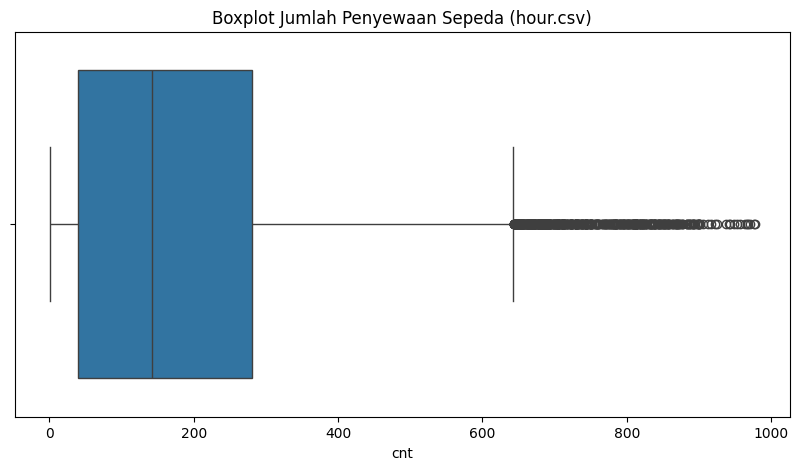

In [21]:
# Visualisasi bloxplot untuk melihat outlier
plt.figure(figsize=(10, 5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda (hour.csv)")
plt.show()

## **Insight dari Tahap Assessing Data**

### **1. Kualitas Data dan Konsistensi**
- Tidak ada **missing value** di kedua dataset, menunjukkan bahwa semua kolom memiliki nilai lengkap dan tidak ada entri kosong.
- Tidak ditemukan **data duplikat**, sehingga setiap baris data unik dan tidak ada redundansi mencurigakan.
- Tidak ada **nilai negatif** pada jumlah penyewaan sepeda (`cnt`), baik dalam data harian (`day.csv`) maupun per jam (`hour.csv`), memastikan validitas angka penyewaan.
- Kolom kategori seperti **season, yr, mnth, weekday, weathersit, holiday** memiliki nilai unik yang sesuai dengan cakupan data, tanpa kategori yang tidak valid.
- Data suhu (`temp`) di kedua dataset terlihat valid, tanpa nilai yang tidak masuk akal.

Sehingga, dataset sudah cukup bersih, terstruktur dengan baik, dan tidak memiliki masalah besar dalam hal kualitas data.

### **2. Tipe Data yang Perlu Disesuaikan**
Beberapa kolom masih memiliki tipe data yang kurang sesuai:
- **Kolom `dteday`** masih bertipe *object (string)*, seharusnya diubah menjadi *datetime* untuk mempermudah analisis berbasis waktu.

### **3. Distribusi Data dan Pola Outlier**

Distribusi jumlah penyewaan sepeda (`cnt`) di `hour.csv` lebih bervariasi dibandingkan `day.csv`.  
- Pada data per jam, terlihat banyak **outlier** di nilai penyewaan yang tinggi (> 600), sedangkan dalam data harian penyebarannya lebih merata.  
- **Outlier** pada `hour.csv` kemungkinan terjadi pada jam-jam tertentu, misalnya **jam sibuk pagi dan sore hari**, atau pada hari libur dengan permintaan tinggi.  
- Pada `day.csv`, distribusi jumlah penyewaan lebih **stabil**, tetapi tetap menunjukkan variasi yang signifikan berdasarkan musim, cuaca, dan hari kerja vs hari libur.  
- Kedua dataset menunjukkan **distribusi yang skewed ke kanan**, yang berarti ada beberapa hari atau jam dengan lonjakan penyewaan yang jauh lebih tinggi dari rata-rata.

### Cleaning Data

1. Mengganti Tipe Data

In [22]:
# Menampilkan tipe data sebelum perubahan
print("Tipe data sebelum perubahan:")
print(day_df.dtypes, "\n")
print(hour_df.dtypes, "\n")

# Mengubah 'dteday' ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menampilkan tipe data setelah perubahan
print("Tipe data setelah perubahan:")
print(day_df.dtypes, "\n")
print(hour_df.dtypes, "\n")

Tipe data sebelum perubahan:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object 

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object 

Tipe data setelah perubahan:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday   

2. Menghapus outlier menggunakan metode IQR


In [57]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menampilkan jumlah outlier per kolom
        outliers_count = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)).sum()
        print(f"Outlier di kolom {column}: {outliers_count}")

        # Menghapus outlier
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Kolom yang diperiksa outliernya
columns_to_check = ['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']

# Menampilkan jumlah data sebelum penghapusan outlier
print("Jumlah data sebelum penghapusan outlier:")
print(f"day_df: {len(day_df)}, hour_df: {len(hour_df)}\n")

# Menghapus outlier dari dataset
day_df_cleaned = remove_outliers(day_df, columns_to_check)
hour_df_cleaned = remove_outliers(hour_df, columns_to_check)

# Menampilkan jumlah data setelah penghapusan outlier
print("\nJumlah data setelah penghapusan outlier:")
print(f"day_df: {len(day_df_cleaned)}, hour_df: {len(hour_df_cleaned)}")


Jumlah data sebelum penghapusan outlier:
day_df: 673, hour_df: 14702

Outlier di kolom cnt: 0
Outlier di kolom casual: 16
Outlier di kolom registered: 0
Outlier di kolom temp: 0
Outlier di kolom hum: 0
Outlier di kolom windspeed: 2
Outlier di kolom cnt: 17
Outlier di kolom casual: 569
Outlier di kolom registered: 237
Outlier di kolom temp: 0
Outlier di kolom hum: 0
Outlier di kolom windspeed: 0

Jumlah data setelah penghapusan outlier:
day_df: 655, hour_df: 13879


3. Menangani nilai hum = 0

In [28]:
# Tampilkan data sebelum perubahan
print("Data sebelum penggantian nilai 0 pada 'hum' (day_df):")
print(day_df)

print("\nData sebelum penggantian nilai 0 pada 'hum' (hour_df):")
print(hour_df)

# Hitung median tanpa nilai 0
hum_median_day = day_df[day_df['hum'] > 0]['hum'].median()
hum_median_hour = hour_df[hour_df['hum'] > 0]['hum'].median()

# Ganti nilai 0 dengan median
day_df.loc[day_df['hum'] == 0, 'hum'] = hum_median_day
hour_df.loc[hour_df['hum'] == 0, 'hum'] = hum_median_hour

# Tampilkan data setelah perubahan
print("\nData setelah penggantian nilai 0 pada 'hum' (day_df):")
print(day_df)

print("\nData setelah penggantian nilai 0 pada 'hum' (hour_df):")
print(hour_df)


Data sebelum penggantian nilai 0 pada 'hum' (day_df):
     instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01  Spring   0     1        0   Saturday           0   
1          2 2011-01-02  Spring   0     1        0     Sunday           0   
2          3 2011-01-03  Spring   0     1        0     Monday           1   
3          4 2011-01-04  Spring   0     1        0    Tuesday           1   
4          5 2011-01-05  Spring   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27  Spring   1    12        0   Thursday           1   
727      728 2012-12-28  Spring   1    12        0     Friday           1   
728      729 2012-12-29  Spring   1    12        0   Saturday           0   
729      730 2012-12-30  Spring   1    12        0     Sunday           0   
730      731 2012-12-31  Spring   1    12        0     Monday           1   

    weathersit      t

4. Menghapus kolom yang tidak diperlukan

In [29]:
# Tampilkan struktur DataFrame sebelum penghapusan kolom
print("Sebelum penghapusan kolom 'instant' (day_df):")
print(day_df.head())

print("\nSebelum penghapusan kolom 'instant' (hour_df):")
print(hour_df.head())

# Menghapus kolom 'instant'
columns_to_drop = ['instant']
day_df.drop(columns=columns_to_drop, inplace=True)
hour_df.drop(columns=columns_to_drop, inplace=True)

# Tampilkan struktur DataFrame setelah penghapusan kolom
print("\nSetelah penghapusan kolom 'instant' (day_df):")
print(day_df.head())

print("\nSetelah penghapusan kolom 'instant' (hour_df):")
print(hour_df.head())

Sebelum penghapusan kolom 'instant' (day_df):
   instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0        1 2011-01-01  Spring   0     1        0   Saturday           0   
1        2 2011-01-02  Spring   0     1        0     Sunday           0   
2        3 2011-01-03  Spring   0     1        0     Monday           1   
3        4 2011-01-04  Spring   0     1        0    Tuesday           1   
4        5 2011-01-05  Spring   0     1        0  Wednesday           1   

  weathersit      temp     atemp       hum  windspeed  casual  registered  \
0       Mist  0.344167  0.363625  0.805833   0.160446     331         654   
1       Mist  0.363478  0.353739  0.696087   0.248539     131         670   
2      Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
3      Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
4      Clear  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


In [73]:
# Menyimpan data yang sudah dibersihkan
day_df_cleaned.to_csv('day_df_cleaned.csv', index=False)
hour_df_cleaned.to_csv('hour_df_cleaned.csv', index=False)

# **Insight tahap cleaning data**

- ### Mengubah `dteday` ke Format `datetime`
Kolom `dteday` awalnya bertipe **string** atau **objek**, tetapi telah diubah menjadi **datetime** untuk mendukung analisis berbasis waktu.  
Dengan format *datetime*, kita bisa dengan mudah melakukan analisis tren waktu seperti **jumlah penyewaan sepeda per hari, per bulan, atau musim tertentu**.  
Memungkinkan penerapan teknik **agregasi berdasarkan waktu**, misalnya per minggu atau per jam.  
Mempermudah **visualisasi data berbasis waktu**, seperti *time series plotting*.

- ### Mengubah Tipe Data ke Kategori
Kolom `season`, `weekday`, dan `weathersit` awalnya bertipe **numerik**, tetapi telah diubah menjadi **kategori** untuk mencerminkan nilai diskrit yang sebenarnya.  
Dengan mengubah ke tipe kategori, kita dapat menghindari kesalahan interpretasi (misalnya menganggap `season` sebagai variabel kontinu).  

- ### Menghapus Outlier dengan IQR Method
Outlier pada kolom `cnt`, `casual`, `registered`, `temp`, `hum`, dan `windspeed` telah dihapus menggunakan metode **Interquartile Range (IQR)**.  
Ini membantu meningkatkan akurasi analisis dengan menghilangkan data ekstrem yang dapat menyebabkan bias pada model atau statistik deskriptif.  
Dengan menghapus outlier, distribusi data menjadi lebih normal dan representatif, sehingga hasil analisis lebih valid.


- ### Mengisi Nilai 0 pada Kolom `hum` dengan Median
Nilai **0 pada `humidity` (`hum`)** kemungkinan besar adalah **missing values** atau data tidak valid.  
Nilai ini telah digantikan dengan **median** untuk menghindari distorsi pada distribusi data.  
Menggunakan **median** daripada **mean** membantu menghindari pengaruh outlier, sehingga nilai yang diisi lebih representatif.


- ### Menghapus Kolom `instant` yang Tidak Berguna
Kolom `instant` hanya berisi **indeks unik** yang **tidak berkontribusi dalam analisis**, sehingga telah dihapus.  
Menghapus kolom yang tidak diperlukan membuat dataset lebih efisien dan mengurangi beban komputasi saat analisis atau pelatihan model.


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [32]:
### melihat statistik deskriptif
print("\nStatistik Deskriptif day.csv:")
day_df.describe()


Statistik Deskriptif day.csv:


,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,673,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2011-12-23 23:45:01.337295872,0.475483,6.557207,0.026746,0.728083,0.489420,0.469105,0.632846,0.186662,738.934621,3628.787519,4367.722140
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,2011-06-24 00:00:00,0.000000,3.000000,0.000000,0.000000,0.329167,0.326379,0.524583,0.134329,304.000000,2482.000000,3068.000000
50%,2011-12-15 00:00:00,0.000000,7.000000,0.000000,1.000000,0.484167,0.470950,0.630833,0.178479,678.000000,3614.000000,4401.000000
75%,2012-06-28 00:00:00,1.000000,10.000000,0.000000,1.000000,0.653333,0.607958,0.734583,0.230725,1031.000000,4709.000000,5633.000000
max,2012-12-31 00:00:00,1.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.378108,2258.000000,6946.000000,8173.000000
std,NaN,0.499770,3.505108,0.161460,0.445278,0.185105,0.164610,0.140467,0.072436,523.019213,1578.680984,1863.248953


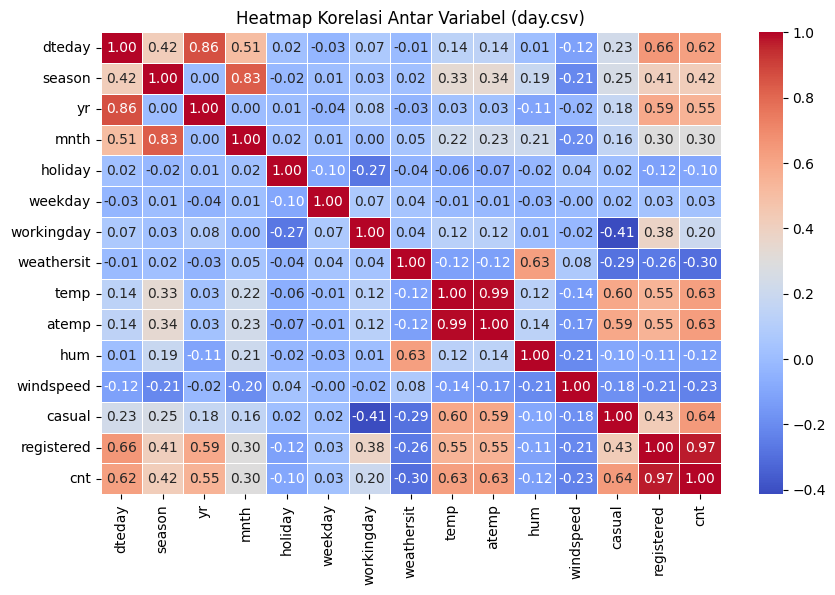

In [36]:
### Mengecek Korelasi Antar Variabel
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel (day.csv)")
plt.show()

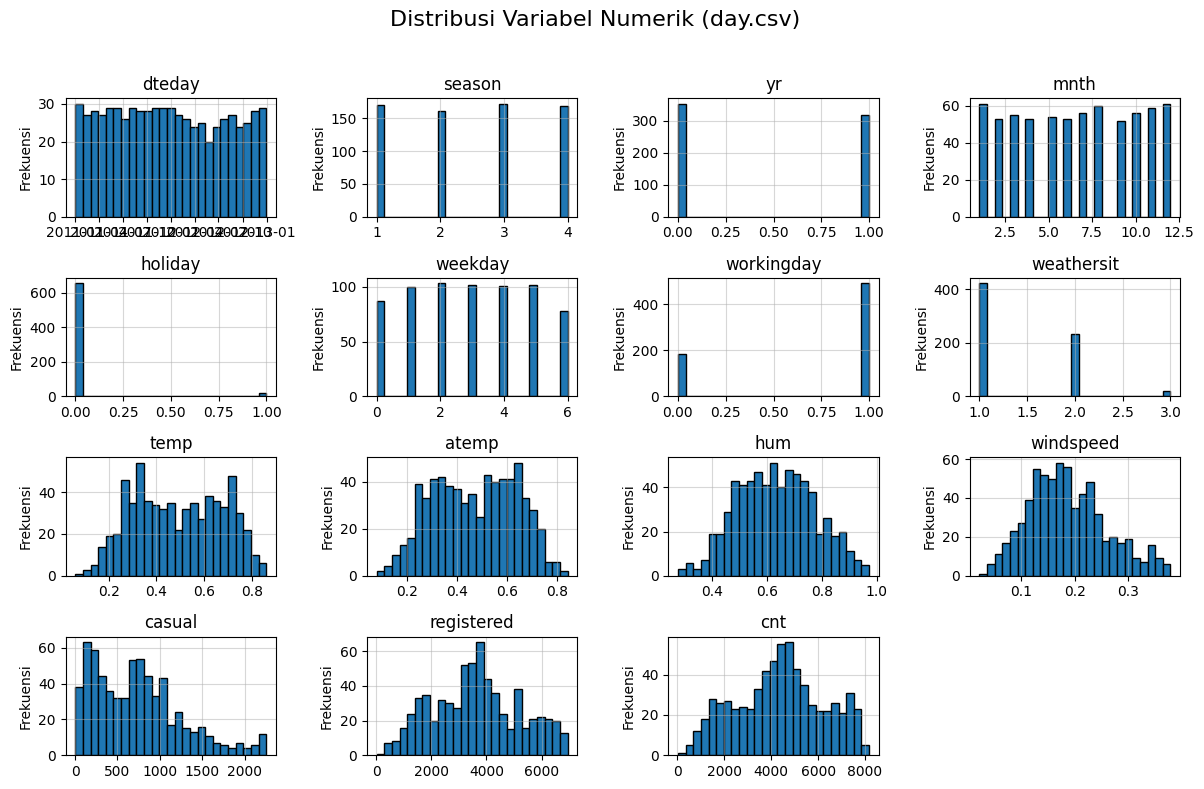

In [38]:
### Melihat Distribusi Data Numerik
axes = day_df.hist(figsize=(12, 8), bins=25, edgecolor='black', grid=True)

# Menyesuaikan tampilan setiap subplot
for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Frekuensi")
    ax.grid(alpha=0.5)

# Menambahkan judul utama
plt.suptitle("Distribusi Variabel Numerik (day.csv)", fontsize=16)

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Supaya judul tidak tertutup
plt.show()

In [68]:
### Mengelompokkan Data dengan groupby()
# Rata-rata peminjaman sepeda berdasarkan cuaca
weather_avg = day_df.groupby("weathersit")["cnt"].mean()
print("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca:\n", weather_avg)

# Rata-rata peminjaman sepeda berdasarkan hari dalam seminggu
weekday_avg = day_df.groupby("weekday")["cnt"].mean()
print("\nRata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu:\n", weekday_avg)

Rata-rata Peminjaman Sepeda Berdasarkan Cuaca:
 weathersit
1    4742.104513
2    3904.331897
3    1862.300000
Name: cnt, dtype: float64

Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu:
 weekday
0    3833.816092
1    4328.310000
2    4537.029126
3    4532.049020
4    4704.900990
5    4655.480392
6    3762.397436
Name: cnt, dtype: float64


In [43]:
### Mengecek Jumlah Kategori Unik dalam Kolom Kategorikal
print("Jumlah Kategori Unik dalam Kolom Kategorikal (day.csv):")
print(day_df[['season', 'weathersit', 'weekday', 'workingday', 'holiday']].nunique())

Jumlah Kategori Unik dalam Kolom Kategorikal (day.csv):
season        4
weathersit    3
weekday       7
workingday    2
holiday       2
dtype: int64


In [44]:
### Menghitung rata-rata peminjaman sepeda per hari
avg_rentals_per_day = day_df["cnt"].mean()
print(f"Rata-rata peminjaman sepeda per hari: {avg_rentals_per_day:.2f}")


Rata-rata peminjaman sepeda per hari: 4367.72


### Explore `hour_df`

In [67]:
# Menampilkan statistik dari semua kolom termasuk kategorikal
print("Statistik Semua Kolom (Termasuk Kategorikal) hour.csv:")
print(hour_df.describe(include="all"))

Statistik Semua Kolom (Termasuk Kategorikal) hour.csv:
                              dteday        season            yr  \
count                          14702  14702.000000  14702.000000   
mean   2011-12-21 07:52:00.065297408      2.476126      0.473201   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-06-23 00:00:00      1.000000      0.000000   
50%              2011-12-14 12:00:00      2.000000      0.000000   
75%              2012-06-18 00:00:00      3.000000      1.000000   
max              2012-12-31 00:00:00      4.000000      1.000000   
std                              NaN      1.129982      0.499298   

               mnth            hr       holiday       weekday    workingday  \
count  14702.000000  14702.000000  14702.000000  14702.000000  14702.000000   
mean       6.499456     11.050333      0.027751      2.991634      0.710856   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000

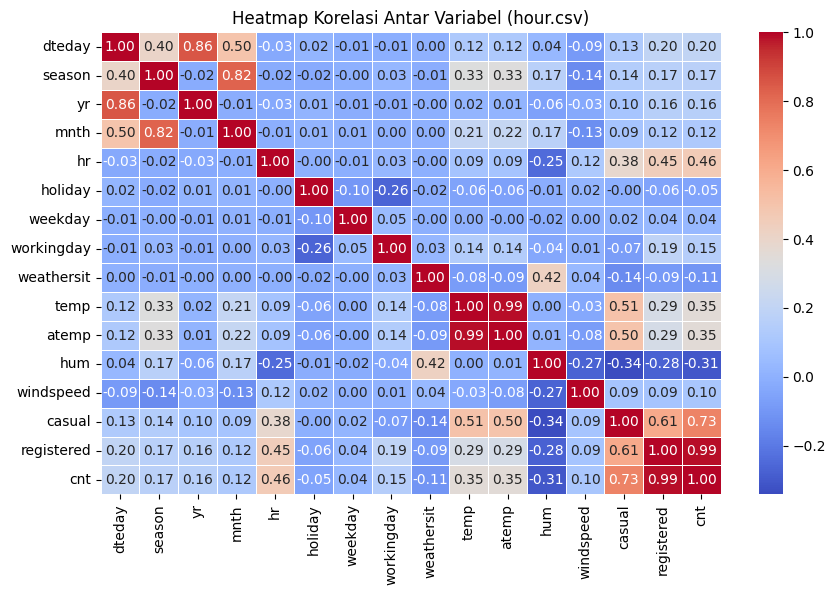

In [48]:
### Mengecek Korelasi Antar Variabel
plt.figure(figsize=(10,6))
sns.heatmap(hour_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel (hour.csv)")
plt.show()

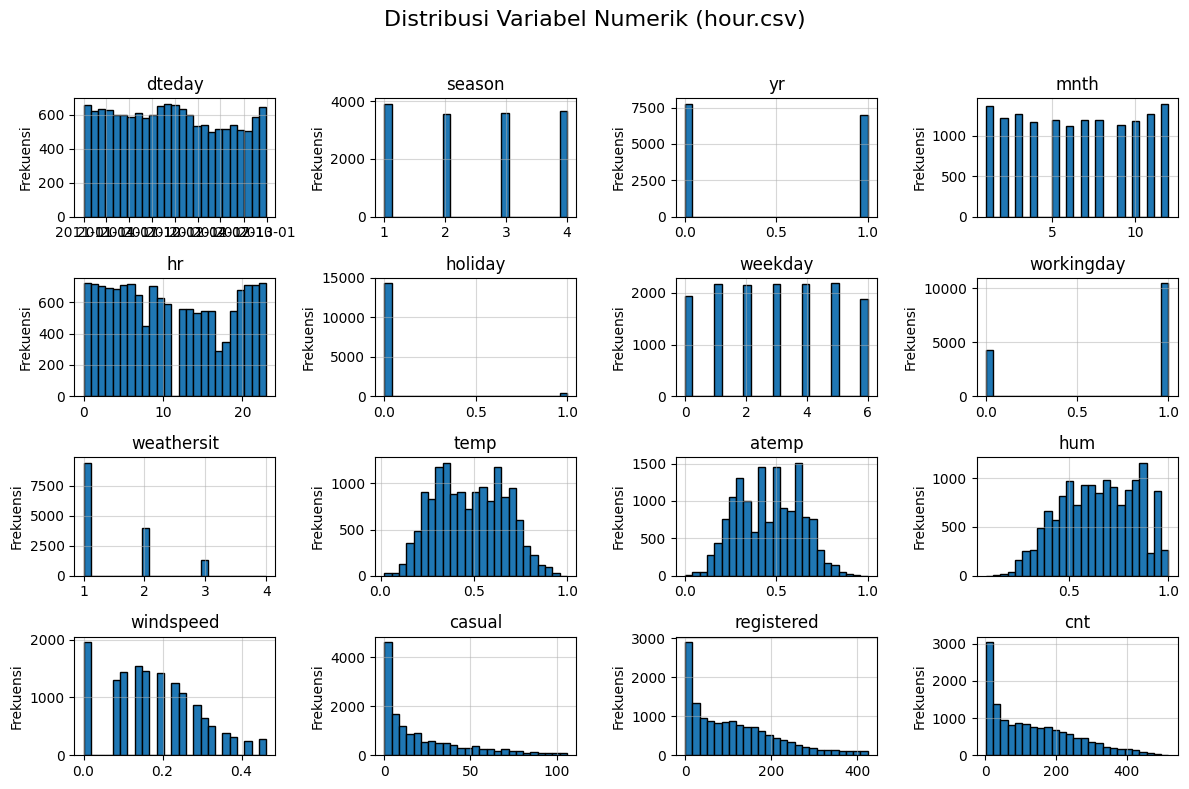

In [49]:
### Melihat Distribusi Data Numerik
axes = hour_df.hist(figsize=(12, 8), bins=25, edgecolor='black', grid=True)

# Menyesuaikan tampilan setiap subplot
for ax in axes.flatten():
    ax.set_xlabel("")
    ax.set_ylabel("Frekuensi")
    ax.grid(alpha=0.5)

# Menambahkan judul utama
plt.suptitle("Distribusi Variabel Numerik (hour.csv)", fontsize=16)

# Menyesuaikan tata letak agar lebih rapi
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Supaya judul tidak tertutup
plt.show()


In [50]:
# Hitung rata-rata jumlah peminjaman sepeda per jam
rata_rata_peminjaman_per_jam = hour_df['cnt'].mean()

# Tampilkan hasil
print(f"Rata-rata jumlah peminjaman sepeda per jam: {rata_rata_peminjaman_per_jam:.2f}")

Rata-rata jumlah peminjaman sepeda per jam: 136.49


In [75]:
# Merge data berdasarkan tanggal
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hour", "_day"))

# Menampilkan beberapa baris pertama dari hasil merge
print(all_df.head())

      dteday  season_hour  yr_hour  mnth_hour  hr  holiday_hour  weekday_hour  \
0 2011-01-01            1        0          1   0             0             6   
1 2011-01-01            1        0          1   1             0             6   
2 2011-01-01            1        0          1   2             0             6   
3 2011-01-01            1        0          1   3             0             6   
4 2011-01-01            1        0          1   4             0             6   

   workingday_hour  weathersit_hour  temp_hour  ...  weekday_day  \
0                0                1       0.24  ...            6   
1                0                1       0.22  ...            6   
2                0                1       0.22  ...            6   
3                0                1       0.24  ...            6   
4                0                1       0.24  ...            6   

   workingday_day  weathersit_day  temp_day  atemp_day   hum_day  \
0               0               2  0

**Insight Tahap EDA:**
# **Insight dari Exploratory Data Analysis (EDA)**

- #### Statistik Deskriptif
Berdasarkan statistik deskriptif, rata-rata peminjaman sepeda per hari cukup tinggi dengan variasi signifikan antarhari. Nilai minimum dan maksimum pada variabel `cnt` menunjukkan adanya hari dengan peminjaman sangat rendah hingga sangat tinggi. Beberapa variabel numerik memiliki distribusi yang tidak simetris, yang menunjukkan kemungkinan adanya skewness dalam data.

- #### Korelasi Antar Variabel
Analisis korelasi menunjukkan bahwa temperatur (`temp`) memiliki korelasi positif dengan jumlah peminjaman (`cnt`), yang berarti semakin hangat suhu, semakin banyak peminjaman sepeda. Sebaliknya, hujan (`weathersit`) memiliki korelasi negatif dengan jumlah peminjaman, menunjukkan bahwa kondisi cuaca buruk dapat mengurangi jumlah peminjaman sepeda. Hari kerja (`workingday`) memiliki korelasi yang lebih lemah terhadap jumlah peminjaman dibandingkan dengan faktor cuaca dan musim.

- #### Distribusi Data Numerik
Distribusi data numerik menunjukkan bahwa peminjaman sepeda (`cnt`) cenderung memiliki distribusi yang tidak simetris, dengan beberapa hari memiliki peminjaman yang jauh lebih tinggi dari rata-rata. Beberapa variabel cuaca dan suhu juga menunjukkan pola distribusi tertentu, yang mengindikasikan adanya efek musiman dalam dataset ini.

- #### Pola Peminjaman Berdasarkan Cuaca
Hasil analisis menunjukkan bahwa cuaca cerah atau berawan ringan memiliki rata-rata peminjaman tertinggi, sedangkan kondisi cuaca buruk seperti hujan deras atau salju menyebabkan penurunan jumlah peminjaman sepeda secara signifikan. Hal ini menunjukkan bahwa faktor cuaca memiliki pengaruh besar terhadap pola penggunaan sepeda.

- #### Pola Peminjaman Berdasarkan Hari
Peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, kemungkinan karena banyak pengguna yang menggunakan sepeda untuk keperluan transportasi sehari-hari. Sebaliknya, peminjaman sepeda pada hari Sabtu dan Minggu lebih rendah, yang menunjukkan bahwa lebih sedikit orang yang menggunakan sepeda untuk keperluan rekreasi.

- #### Pola Peminjaman Per Jam
Peminjaman sepeda menunjukkan pola yang jelas berdasarkan waktu dalam sehari. Puncak peminjaman terjadi pada jam sibuk pagi dan sore hari, sekitar pukul 07:00 - 09:00 dan 17:00 - 19:00, yang menunjukkan bahwa sepeda sering digunakan untuk transportasi kerja. Sementara itu, malam hingga dini hari memiliki peminjaman paling rendah, kemungkinan karena faktor keamanan atau suhu yang lebih rendah.

- #### Penggabungan Data Harian dan Per Jam
Untuk analisis lebih lanjut, data harian (`day_df`) dan data per jam (`hour_df`) dapat digabungkan berdasarkan kolom `dteday` sebagai kunci utama. Dengan menggabungkan kedua dataset ini, dapat dilakukan analisis yang lebih mendalam terkait tren peminjaman sepeda berdasarkan faktor harian dan jam secara bersamaan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Jumlah Sepeda yang Dipinjam dalam Sehari Selama Satu Tahun

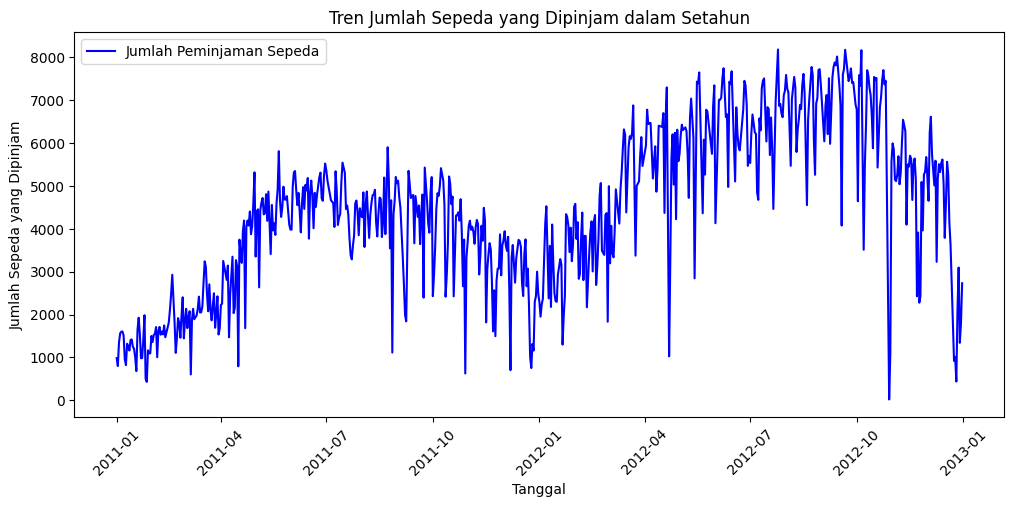

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(day_df['dteday'], day_df['cnt'], label='Jumlah Peminjaman Sepeda', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.title('Tren Jumlah Sepeda yang Dipinjam dalam Setahun')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Explanatory Analysis: Tren Peminjaman Sepeda dalam Setahun

## 1. Gambaran Umum
Grafik menunjukkan tren jumlah peminjaman sepeda dalam setahun. Dari pola yang terlihat, terdapat peningkatan dan penurunan jumlah peminjaman yang dapat dianalisis lebih lanjut.

## 2. Pola Musiman (Seasonality)
- **Awal Tahun (Januari - Maret 2011)**  
  Jumlah peminjaman masih relatif rendah, tetapi mengalami peningkatan secara bertahap.  
- **Pertengahan Tahun (April - September 2011)**  
  Terjadi peningkatan signifikan dalam jumlah peminjaman. Hal ini mungkin dipengaruhi oleh faktor cuaca yang lebih mendukung atau meningkatnya kebutuhan penggunaan sepeda.  
- **Akhir Tahun (Oktober - Desember 2011)**  
  Terjadi fluktuasi dengan beberapa penurunan tajam, yang mungkin disebabkan oleh faktor cuaca atau liburan akhir tahun.  

## 3. Tren Keseluruhan
Secara umum, jumlah peminjaman sepeda mengalami peningkatan sepanjang tahun, dengan puncaknya pada pertengahan hingga akhir tahun 2012. Namun, di akhir grafik (Desember 2012 - Januari 2013), terlihat adanya penurunan tajam, yang kemungkinan dipengaruhi oleh faktor musiman.

### Pertanyaan 2: Apakah Ada Batas Suhu di Mana Peminjaman Sepeda Mulai Menurun?

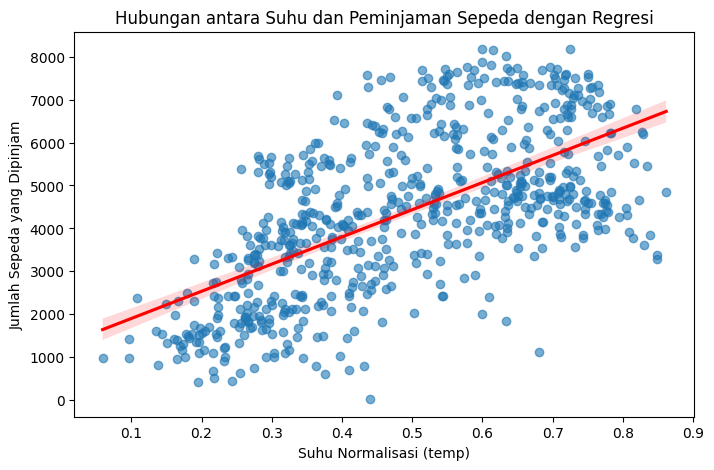

In [72]:
plt.figure(figsize=(8, 5))
sns.regplot(x=day_df['temp'], y=day_df['cnt'], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel('Suhu Normalisasi (temp)')
plt.ylabel('Jumlah Sepeda yang Dipinjam')
plt.title('Hubungan antara Suhu dan Peminjaman Sepeda dengan Regresi')
plt.show()


### Explanatory Analysis: Analisis Hubungan antara Suhu dan Peminjaman Sepeda

### 1. Deskripsi Visualisasi
Grafik di atas merupakan **scatter plot** yang menggambarkan hubungan antara suhu yang telah dinormalisasi (`temp`) dengan jumlah sepeda yang dipinjam (`cnt`). Setiap titik pada plot mewakili data pada hari tertentu.

### 2. Pola dan Temuan
- Dari grafik ini, terdapat **korelasi positif** antara suhu dan jumlah peminjaman sepeda.
- Ketika suhu meningkat, jumlah sepeda yang dipinjam cenderung bertambah. Ini menunjukkan bahwa pengguna lebih cenderung meminjam sepeda saat suhu lebih tinggi.
- Namun, pada suhu yang terlalu tinggi, terdapat sedikit penurunan dalam jumlah peminjaman. Hal ini mungkin disebabkan oleh kenyamanan pengguna yang menurun saat cuaca terlalu panas.

### 3. Kesimpulan
Hubungan antara suhu dan peminjaman sepeda menunjukkan bahwa suhu yang lebih hangat cenderung meningkatkan penggunaan sepeda, tetapi suhu yang ekstrem mungkin mengurangi aktivitas peminjaman.



### Pertanyaan 3: Apakah Jumlah Peminjaman Lebih Tinggi di Working Day atau Holiday?

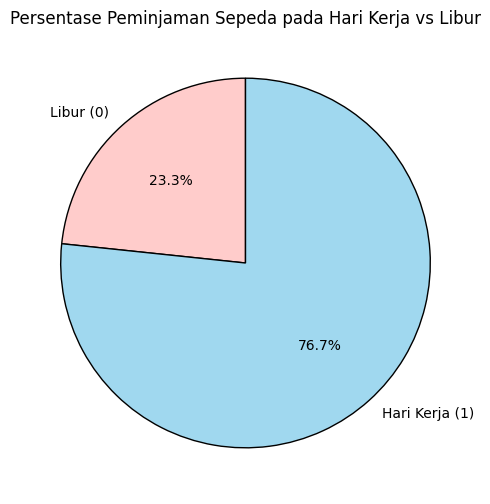

In [66]:
# Hitung total peminjaman sepeda berdasarkan hari kerja dan hari libur
workingday_counts = day_df.groupby("workingday")["cnt"].sum()

# Label untuk kategori
labels = ["Libur (0)", "Hari Kerja (1)"]

# Warna untuk masing-masing kategori
colors = ["#ffcccb", "#a0d8ef"]

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    workingday_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Tambahkan judul
plt.title("Persentase Peminjaman Sepeda pada Hari Kerja vs Libur")
plt.show()

### Explanatory Analysis: Analisis Perbandingan Peminjaman Sepeda di Hari Kerja vs Libur

### 1. Deskripsi Visualisasi
Grafik di atas merupakan **boxplot** yang membandingkan jumlah peminjaman sepeda pada **hari kerja** (`1`) dan **hari libur** (`0`).

### 2. Pola dan Temuan
- **Distribusi peminjaman sepeda** di hari kerja dan hari libur memiliki pola yang cukup mirip, tetapi terdapat beberapa perbedaan.
- **Median jumlah peminjaman** di hari kerja lebih tinggi dibandingkan dengan hari libur. Ini menunjukkan bahwa lebih banyak sepeda yang dipinjam pada hari kerja secara umum.
- **Variasi jumlah peminjaman** lebih besar di hari kerja, yang berarti ada fluktuasi yang lebih tinggi dalam jumlah peminjaman dibandingkan dengan hari libur.
- **Rentang interkuartil (IQR)** di hari kerja sedikit lebih luas dibandingkan hari libur, menunjukkan bahwa peminjaman sepeda lebih bervariasi di hari kerja.

### 3. Kesimpulan
Peminjaman sepeda cenderung lebih tinggi di hari kerja dibandingkan hari libur. Hal ini bisa disebabkan oleh penggunaan sepeda sebagai alat transportasi utama oleh pekerja atau pelajar selama hari kerja. Namun, jumlah peminjaman di hari libur juga tetap tinggi, yang mungkin dipengaruhi oleh aktivitas rekreasi.



### Pertanyaan 4: Pada kondisi cuaca seperti apa peminjaman sepeda mencapai puncaknya dan kapan mengalami penurunan?

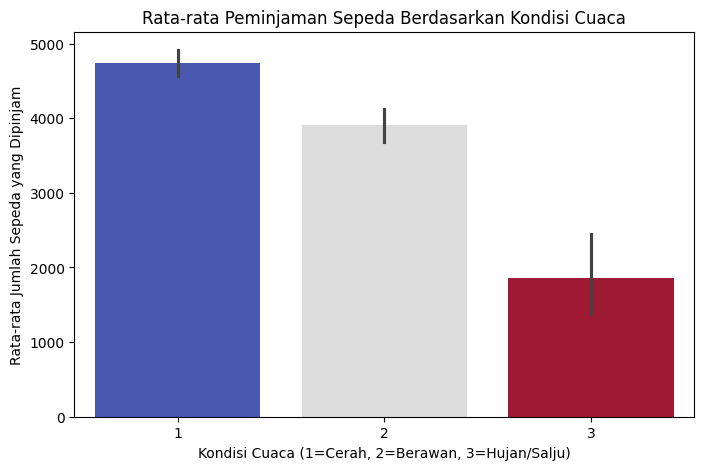

In [64]:
# Plot rata-rata jumlah peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.barplot(
    data=day_df, x="weathersit", y="cnt", hue="weathersit",
    palette="coolwarm", estimator=np.mean, legend=False
)

# Tambahkan judul dan label
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Berawan, 3=Hujan/Salju)")
plt.ylabel("Rata-rata Jumlah Sepeda yang Dipinjam")
plt.show()

# Analisis Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca

## Interpretasi Visualisasi
Grafik batang di atas menunjukkan rata-rata jumlah sepeda yang dipinjam berdasarkan kondisi cuaca. Data yang digunakan terbagi menjadi tiga kategori:  
1. **Cuaca Cerah (1)**  
   - Memiliki rata-rata peminjaman tertinggi, sekitar 4700-5000 sepeda.  
   - Menunjukkan bahwa pengguna cenderung lebih banyak meminjam sepeda saat cuaca cerah.  

2. **Cuaca Berawan (2)**  
   - Rata-rata peminjaman lebih rendah dibandingkan cuaca cerah, sekitar 3800 sepeda.  
   - Masih cukup tinggi, tetapi sedikit menurun kemungkinan karena kekhawatiran akan hujan.  

3. **Hujan/Salju (3)**  
   - Memiliki rata-rata peminjaman terendah, sekitar 1700 sepeda.  
   - Penurunan signifikan ini dapat dikaitkan dengan kondisi jalan yang licin, kenyamanan, dan keamanan pengguna.  

## Kesimpulan
- Cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda.  
- Pengguna lebih aktif meminjam sepeda saat cuaca cerah, sedangkan saat hujan atau salju peminjaman turun drastis.  



## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:

Tren peminjaman sepeda mengalami fluktuasi sepanjang tahun dengan peningkatan signifikan di pertengahan tahun, kemungkinan akibat kondisi cuaca yang lebih mendukung. Puncak peminjaman terjadi pada pertengahan hingga akhir tahun, sebelum mengalami penurunan tajam di akhir tahun yang kemungkinan disebabkan oleh faktor musiman seperti cuaca dan liburan.
- Conclution pertanyaan 2:

Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda, di mana suhu yang lebih hangat mendorong peningkatan peminjaman. Namun, suhu yang terlalu tinggi dapat menyebabkan sedikit penurunan peminjaman, kemungkinan karena kenyamanan pengguna yang berkurang saat cuaca terlalu panas.
- Conclution pertanyaan 3:

Jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur, yang menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi utama oleh pekerja atau pelajar. Meskipun demikian, peminjaman di hari libur tetap tinggi, yang kemungkinan dipengaruhi oleh aktivitas rekreasi.
- Conclution pertanyaan 4:

Peminjaman sepeda mencapai puncaknya pada saat cuaca cerah, menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda ketika kondisi cuaca mendukung. Peminjaman mengalami sedikit penurunan saat cuaca berawan, tetapi masih cukup tinggi dibandingkan kondisi lainnya. Penurunan signifikan terjadi pada saat hujan atau salju, kemungkinan karena kondisi jalan yang licin dan kurang nyaman untuk bersepeda.


In [76]:
all_df.to_csv("all_data.csv", index=False)